In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

## Data Science Workflow

![Data Science Workflow](../assets/images/data-science-workflow.png)

Today we are talking about exploring data as part of the "prepare" step.

<a id="codealong-examining-the-titanic-dataset"></a>
## Code-Along: Examining the Titanic Data Set

---

#### Objective: Read in the Titanic data and look at a few summary statistics.

In [3]:
# import pandas
# /scrub/
import pandas as pd

In [4]:
# Use pandas to load data
# /scrub/
titanic = pd.read_csv('../data/titanic.csv')

#### Print out the column names:

In [5]:
# /scrub/
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [6]:
# /scrub/
titanic.shape

(891, 11)

#### Print out the data types of the columns using the `.dtypes` attribute:

In [7]:
# /scrub/
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

#### Print out the first five rows of the data using the built-in `.head()` function:

In [8]:
# /scrub/
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [9]:
# /scrub/
titanic.loc[:, 'pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

There are many ways to slice a pandas dataframe. I recommend using `.loc` to slice by index/label and `.iloc` to slice by position.

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [10]:
# /scrub/
titanic.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Mellors, Mr. William John",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# Uh oh, we have some missing values, but we won't do anything with them for now

### Diagnosing Data Problems

- Whenever you get a new data set, the fastest way to find mistakes and inconsistencies is to look at the descriptive statistics.
  - If anything looks too high or too low relative to your experience, there may be issues with the data collection.
- Your data may contain a lot of missing values and may need to be cleaned meticulously before they can be combined with other data.
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data-cleaning journey.
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data. Other times, you may want to drop the offending rows or do real imputation.

<a id="descriptive-statistics-fundamentals"></a>
## Descriptive Statistics Fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

### A Quick Review of Notation

The sum of a constant $k$, $n$ times
$$\sum_{i=1}^nk$$

In [12]:
# k + k + k + k + ... + k

> It is often helpful to think of these sums as `for` loops. For example, the equation can be compactly computed like so:

```
total = 0

# For i from 1 up to and including n, add k to the sum.
for i in range(1, n+1):
    total += k
```

> Or, even more succinctly (using a generator comprehension):

```
total = sum(k for i in range(1, n+1))
```

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [13]:
# 1 + 2 + 3 + ... + n

> ```
total = sum(i for i in range(1, n+1))
```

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [14]:
# x_1 + x_2 + x_3 + ... + x_n

> ```
total = sum(xi in x)   # or just sum(x)
```

#### Code-Along

_Optional: Write down the mathematical notation for the following questions:_

In [15]:
# Compute the sum of 7 4s using base Python
# /scrub/
sum([4, 4, 4, 4, 4, 4, 4])

28

$$\sum_{i=1}^{7}{4}$$

In [16]:
# Compute the sum of 7 4s in a numpy array using the numpy .sum() method
# /scrub/
my_array = np.array([4, 4, 4, 4, 4, 4, 4])
my_array.sum()

28

In [17]:
# Python list comprehension
# /scrub/
[x+1 for x in range(10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
# Compute the sum of 1 through 10 using base Python
# /scrub/
sum([x + 1 for x in range(10)])

55

$$\sum_{i=0}^{10}{x_i}$$

In [19]:
# Use the "fare" column of the `titanic` dataframe to compute the total fare paid by passengers
# /scrub/
titanic.loc[:, 'fare'].sum()

28693.949299999967

<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The **mean** (average) of a set of numbers is their sum divided by their count:
$$\bar{X} =\frac 1n\sum_{i=1}^nx_i$$

#### Median
The median refers to the midpoint in a series of numbers:

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

# Exercise

Work in groups of three in breakout rooms. When your entire breakout room agrees on an answers, post it to Slack.

1. Calculate the mean, median, and mode for each of the following sets of numbers "by hand." Feel free to use Python or a calculator, but write out all of the steps.
    1. 75, 87, 49, 68, 75, 84, 94
    1. 1, 1, 2, 3, 4, 5, 6, 7, 8, 1000
1. For list b, which of these "measures of central tendency" best captures the intuitive idea of a "typical" value in the set? Why do the others return "atypical" values?
1. If you are worried about outliers in a data set throwing off your results for the typical case, would you use methods based on the mean or the median?

/scrub/

[iPad/board]

## 1.

### A.

#### Mean

75 + 87 + 49 + 68 + 75 + 84 + 94 = 532

532 / 7 = 76

#### Median

49, 68, 75, [75], 84, 87, 94

75

#### Mode

75

### B.

#### Mean

1 + 1 + 2 + 3 + 4 + 5 + 6 + 6 + 8 + 1000 = 1036

1036 / 10 = 103.6

#### Median

1, 1, 2, 3, [4, 5], 6, 6, 8, 1000

4.5

#### Mode

1

## 2.

The median (4.5) is the most typical value. The outlier value 1000 has a large effect on the mean, but it does not affect the median any more than any other value greater than 4.5. The mode isn't very meaningful when we have little repetition.

When the distribution of values is nice and symmetric, the mean, median, and mode are about the same. When it is **skewed**, meaning that you have more values far from the center in one direction or the other, the mean gets pulled toward the skew more than the median, which gets pulled more than the mode.

![](../assets/images/skewness_and_central_tendency.png)

## 3.

Use the median rather than the mean to make your method more resistant to outliers.

#### Code-Along

In [20]:
# Use pandas to find the mean of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].mean()

32.2042079685746

In [21]:
# Use pandas to find the median of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].median()

14.4542

In [22]:
# Use pandas to find the mode of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].mode()

0    8.05
dtype: float64

# Exercise

The mean, median, and more are quite different. What does that tell you?

/scrub/

The distribution of fares is skewed. That makes sense: the majority of people ride third class, so the mode is the third-class price; the "typical," "middle" passenger rides second class, so the median is the second-class price; and first-class tickets are much more expensive than second- or third-class tickets, so they have a lot of influence on the mean.

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

![](../assets/images/variance_magnitude.png)

#### Definitions

- The **sample variance** of a data set is the average squared distance of each point from the mean, except that we divide by $n-1$ instead of $n$: $\frac{1}{n-1}\sum (X - \bar{X})^2$.
- The **sample standard deviation** is the square root of the sample variance: $\sqrt{\frac{1}{n-1}\sum (X - \bar{X})^2}$
- The **sample standard error** of an estimator is an estimate of its precision.

#### Important Notes

- You can think of sample variance/standard deviation as an estimate of the true variance/standard deviation of your variable, and of sample standard error as an estimate of the true standard error of your estimator.
- Standard deviation is more interpretable than variance because it is on the same scale as the original data. (The square root "undoes" the squaring.)

# Exercise

As sample size increases, estimators gets more precise, but the underlying distribution does not change. So what happens to the variance, standard deviation, and standard error?

/scrub/

Variance and standard deviation do not change, but standard error decreases.

#### Unimportant Note

We divide by $n-1$ instead of $n$ when calculating sample variance/standard deviation to make those estimates "unbiased." This approach is arguably misguided, but it doesn't really matter because dividing by $n-1$ is almost the same as dividing by $n$ as long as $n$ isn't very small.

#### Assign the first 5 rows of titanic age data to a variable:

In [23]:
# Take the first 5 rows of titanic age data
first_five = titanic.loc[:4, 'age']

first_five

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

We needed `:4` instead of `:5` because we are using label-based slicing (`.loc`) rather than position-based slicing (`.iloc`).

#### Calculate the mean "by hand:"

In [24]:
mean = (22 + 38 + 26 + 35 + 35) / 5.0
mean

31.2

#### Calculate the variance "by hand" (using the mean you just calculated):

In [25]:
variance = (np.square(22 - mean)
            + np.square(38 - mean)
            + np.square(26 - mean)
            + np.square(35 - mean)
            + np.square(35 - mean)) / 4.0
variance

46.699999999999996

#### Calculate the standard deviation "by hand" (using the variance you just calculated):

In [26]:
np.sqrt(46.699999)

6.8337397521415753

#### Calculate the mean, variance, and standard deviation using Pandas:

In [27]:
# /scrub/
print(first_five.mean())
print(first_five.var())
print(first_five.std())

31.2
46.699999999999996
6.833739825307955


<a id="our-first-model"></a>
## Our First Model
---

A statistical model is like a model car: it doesn't capture everything about its target, but it tries to capture what we care about for some purpose.

E.g. a model to predict lung cancer might use age and smoking history.

As an extremely simple model that we can use as a baseline, we can just use the mean of a variable to predict its value in a particular case.

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [28]:
# /scrub/
y = titanic.loc[:, 'fare']

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [29]:
# /scrub/
y_pred = y.mean()

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

In [30]:
# /scrub/
mse = np.mean(np.square(y-y_pred))
mse

2466.6653116850434

# Exercise

The mean squared error is essentially equal to what **in this particular case?**

/scrub/

The sample variance

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [31]:
# /scrub/
rmse = np.sqrt(mse)
rmse

49.66553444477411

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## A Short Introduction to Model Bias and Variance 

---

- **Objective:** Describe the bias and variance of statistical estimators.

- Model **bias** is systematic error that won't go away no matter how much data you collect.
- Model **variance** is random error that will fade away as you collect more data (and refit the model).
- What you should do next to improve your model depends on whether it has more of a bias problem or more of a variance model.

/scrub/

[iPad/board]

![](../assets/images/bias_variance.png)

- Red has high bias -- more data will let you hone in on the best possible line, but you'll still have a lot of error.
- Purple has high variance -- with enough data it will catch on to what's really going on, but right now it's chasing the individual data points around. It has low error on these points, but it probably wouldn't do well on new data.
- Green strikes a good balance.

<a id="correlation-and-association"></a>
## Correlation and Association
---

- **Objective:** Describe characteristics and trends in a data set using visualizations.

The magnitude of the **(Pearson) correlation coefficient** for a pair of variables measures how well you could predict one as a linear function of the other; its sign indicates whether the tend to move in the same direction or in opposite directions.

![Example correlation values](../assets/images/correlation_examples.png)

# Exercise

Based on the characterization of the correlation coefficient given above, why is its value 0 in the third row even though the two variables are clearly related?

/scrub/

The Pearson correlation coefficient only reflects a *linear* relationship.

<a id="codealong-correlation-in-pandas"></a>
### Code-Along: Correlation in Pandas

**Objective:** Explore options for measuring and visualizing correlation in Pandas.

#### Display the correlation matrix for all Titanic variables:

In [32]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Use Seaborn to plot a heat map of the correlation matrix:

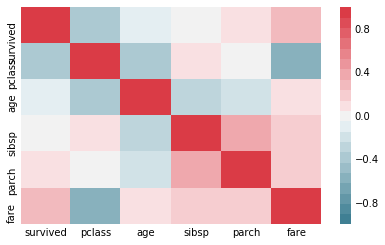

In [33]:
sns.heatmap(titanic.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

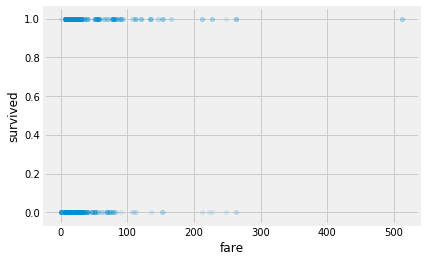

In [34]:
# Take a closer look at survived and fare using a scatter plot
titanic.plot.scatter(x='fare', y='survived', alpha=.1)

# Exercise

Is the Pearson correlation coefficient a good tool for quantifying the relationship between fare and survival? Why or why not?

/scrub/

Not really. Survival is discrete, so it doesn't make much sense to think of it as a *linear* function of fare.

<a id="the-normal-distribution"></a>
## The Normal Distribution
---

- **Objective:** Identify a normal distribution within a data set using summary statistics and data visualizations.

### What is the Normal Distribution?

![](../assets/images/normal_distribution.png)

Symmetric "Bell curve"

![](../assets/images/normal_std.png)

#### Why do we care?

- Aggregated processes are distributed normally, regardless of their underlying distributions, as long as they aren't too correlated (central limit theorem). As a result, they show up a lot.
- They have some nice mathematical properties.
- Many models (e.g. linear regression) are designed for normally distributed data.

#### Plot a histogram of 1,000 samples from a random normal distribution:

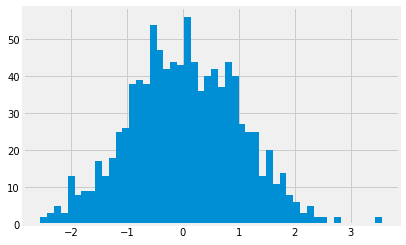

In [35]:
data = np.random.randn(1000)
plt.hist(data, bins=50);

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](../assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

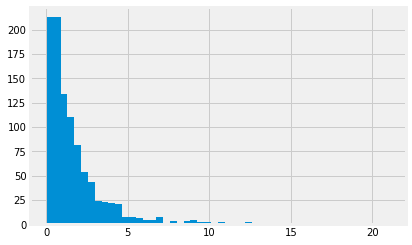

In [36]:
# Plot a lognormal distribution generated with NumPy
data = np.random.lognormal(size=1000)

plt.hist(data, bins=50);

Many algorithms rely on the mean being "typical." With skewed data, you may have to transform your data or set your algorithms to work with the median.

<a id="determining-the-distribution-of-your-data"></a>
## Determining the Distribution of Your Data
---

**Objective:** Create basic data visualizations, including scatterplots, box plots, and histograms.

#### Use the `.hist()` function of your Titantic DataFrame to plot histograms of all the variables in your data.

- The function `plt.hist(data)` calls the Matplotlib library directly.
- However, each DataFrame has its own `hist()` method that by default plots one histogram per column. 
- Given a DataFrame `my_df`, it can be called like this: `my_df.hist()`. 

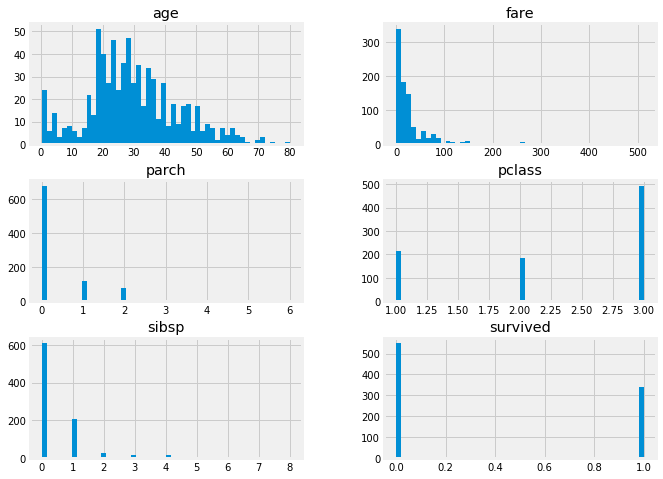

In [37]:
# Plot all variables in titanic using histograms
titanic.hist(figsize=(10, 8), bins=50);

#### Use the built-in `.plot.box()` function of your Titanic DataFrame to plot box plots of your variables.

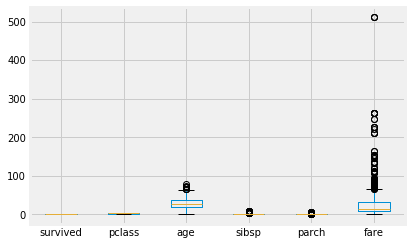

In [38]:
# Plotting all histograms can be unweildly, boxplots can be more concise
titanic.plot.box()

The box encloses the middle 50% of the values. The whiskers extend out to the min and max, except that points more than 1.5 times as far from the median as the size of the box are considered "outliers" and plotted as individual points. Set `showfliers=False` to leave out those points.

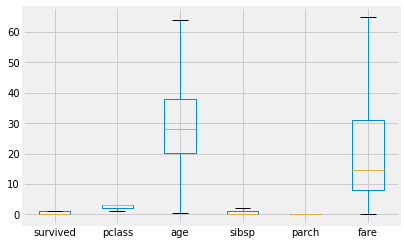

In [39]:
titanic.plot.box(showfliers=False)

<a id="exercise"></a>
### Exercise

1. Look at the Titanic data variables.
- Are any of them normal?
- Are any skewed?
- How might this affect our modeling?

/scrub/

- Fare has a strong positive skew.
- Age is interesting. The bulk of the distribution has a positive skew, but there are many very young children. I wonder if there is a data quality issue that is affecting the reported ages under 20.
- The other variables are categorical, so normal/skewed doesn't apply.

<a id="topic-review"></a>
## Lesson Review
---

1. We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

/scrub/

1. Measures of central tendency, measures of dispersion, meaures of association
- Histograms, correlation plots, boxplots
- Model bias is systematic error that won't go away no matter how much data you have. Model variance is random error that goes away as the size of the data set increases. The distinction is important because what you should do next to improve your model depends primarily on whether it has more of a bias problem or more of a variance problem.
- Normal/non-normal, mean, variance, skewness.

# Questions?

# Exit Tickets

https://docs.google.com/forms/d/e/1FAIpQLSfvZxGW3CHmZzIhNqz-5uzMeDTQHHDOH8G2ovTPbT5U6Q8KLA/viewform?usp=send_form